In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from IPython.display import Latex
from IPython.html.widgets import interactive
%pylab inline --no-import-all


In [ ]:
N=10000
y=np.zeros([4])
Lo=.5
L=1.
vo=1.4
thetao=np.pi/2
omegao=1.
beta=0.
b=2

In [ ]:
y[0]=L
y[1]=vo
y[2]=thetao
y[3]=omegao

In [ ]:
time=np.linspace(0,1000,N)

In [ ]:
k=2.5
m=.2
gravity=9.8

In [ ]:
def spring_pendulum(y,time):
    g0=y[1]
    g1=Lo+y[0]*y[3]*y[3]-k/m*y[0]+gravity*np.cos(y[2])
    g2=y[3]
    g3=-(gravity*np.sin(y[2])+2.0*y[1]*y[3])/(Lo+y[0])
    return np.array([g0,g1,g2,g3])

In [ ]:
answer=odeint(spring_pendulum,y,time)

In [ ]:
xdata=(Lo+answer[:,0])*np.sin(answer[:,2])
ydata=-(Lo+answer[:,0])*np.cos(answer[:,2])

In [ ]:
fig, ax=plt.subplots()
ax.plot(xdata,ydata)


In [ ]:
def damped_driven_pendulum(state,time):
    g0=state[1]
    g1=-gravity/Lo*np.sin(state[0])-beta*state[1]+beta*np.cos(omegao*time/3.)
    return np.array([g0,g1])

In [ ]:
state=np.zeros(2)
state[0]=thetao
state[1]=omegao
answer=odeint(damped_driven_pendulum,state,time)

In [ ]:
fig,ax=plt.subplots()
ax.plot(answer[:,0],answer[:,1])

In [ ]:
skip=100
answer=answer[skip*]

In [ ]:
# x''' +Ax'' -x'^2+x=0
# x'=v
# v'=a
# a'=-Av'+v^2-x

def jerk(state,time):
    g0=state[1]
    g1=state[2]
    g2=-A*state[2]+state[1]**2-state[0]
    return np.array([g0,g1,g2])

In [ ]:
def jerk2(state,time):
    g0=state[1]
    g1=state[2]
    g2=-state[1]+state[0]**2-B
    return np.array([g0,g1,g2])

In [ ]:
A=2.017
B=2.2
xo=.4
vo=-.4
ao=.3
vector=np.zeros(3)
vector[0]=xo
vector[1]=vo
vector[2]=ao
N=1000000
time=np.linspace(0,1000,N)

In [ ]:
answer=odeint(jerk,vector,time)

In [ ]:
fig, ax=plt.subplots()
ax.plot(answer[:,0],answer[:,1])
ax.plot(xo,vo,'x')


In [ ]:
plot(time,answer[:,2])
show()

In [ ]:
A=2.017
B=.01
xo=0
vo=-.001
ao=0
vector=np.zeros(3)
vector[0]=xo
vector[1]=vo
vector[2]=ao
N=5000
time=np.linspace(0,500,N)

In [ ]:
answer=odeint(jerk2,vector,time)

fig,ax=plt.subplots()
ax.plot(answer[:,0],answer[:,1])


In [ ]:
A=2.017
B=.01
xo=0.
vo=-.001
ao=0.
vector=np.zeros(3)
vector[0]=xo
vector[1]=vo
vector[2]=ao
N=50000000
time=np.linspace(0,5000,N)
fig, ax=plt.subplots()
vo=np.linspace(-.1,0,50)
for j in vo:
    P=[]
    
   
    vector[1]=j
    answer=odeint(jerk2,vector,time)
    
    
    
    for i in range(len(answer[:,1])-2):
        test=answer[i,2]*answer[i+1,2]
        if test<0:
            P.append((answer[i,0],answer[i,1]))
            
   
    ax.plot(np.array(P)[:,1],np.array(P)[:,0],'.',markersize=1)
    plt.ylim(-.2,.2)
    plt.xlim(-.2,.2)
    

   


In [11]:
def diode(x):
    return -6*min(x,0)
    

In [12]:
def sprott_ckt(state,time,Rv):
    g0=state[1]
    g1=state[2]
    g2=-(R/Rv)*state[2]-state[1]+diode(state[0])-(R/Ro)*Vo
    return np.array([g0,g1,g2])

In [57]:
R=47e3
Ro=157e3
Rv=50e3
Vo=.253
vector=np.zeros(3)
vector[0]=.75
vector[1]=0.
vector[2]=0
N=50000
time=np.linspace(0,1000,N)

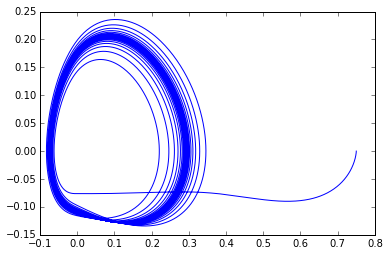

In [58]:
answer=odeint(sprott_ckt,vector,time,args=(Rv,))

fig,ax=plt.subplots()
ax.plot(answer[:,0],answer[:,1])

In [ ]:
fig, ax=plt.subplots()
ax.plot(time[-1000:],answer[-1000:,0],',')

In [ ]:
from scipy.signal import argrelextrema


In [ ]:
c=answer[-5000:,0]
a=c[argrelextrema(c,np.greater)[0]]
r=np.full((len(a),1), Rv)
fig, ax = plt.subplots()
ax.plot(r,a,',k')
plt.ylim(0,.5)
a

In [ ]:
Rv=np.linspace(50e3,250e3,1000)
fig, ax = plt.subplots()
for i in Rv:
    answer=odeint(sprott_ckt,vector,time,args=(i,))
    c=answer[-5000:,0]
    a=c[argrelextrema(c,np.greater)[0]]
    r=np.full((len(a),1), i)
    ax.plot(r,a,',k')
    




In [ ]:
vo

In [ ]:
steps=100
theta_initial=np.pi/6.0
v_initial=0.0

beta=0.5
amp=1.2
omega_d=0.713
time_step=2.0*np.pi/(omega_d*steps)

In [ ]:
N=300
skip=100

In [ ]:
initial_state=np.array([theta_initial,v_initial])

In [ ]:
time=np.arange(0.,N*(2.0*np.pi)/omega_d,time_step)

In [ ]:
answer=odeint(DE_pendulum,initial_state,time)

In [ ]:
answer=answer[skip*steps:]

In [ ]:
answer

In [ ]:
steps=100
theta_initial=np.pi/6.0
v_initial=0.0
beta=.5
amp=1.2
N=500
skip=200
initial_state=np.array([theta_initial,v_initial])
Rv=np.linspace(.8,.6,1000)
#Rv=(.713,.715,.724,.7)
for a in Rv:
    time_step=2.0*np.pi/(a*steps)
    time=np.arange(0.,N*(2.0*np.pi)/a,time_step)
    
    answer=odeint(DE_pendulum,initial_state,time,args=(a,))
    
    answer=answer[skip*steps:]
    
    offset=0
    max_index=(N-skip)*steps-offset
    P_thetas=[]
    P_omegas=[]
    for i, position in enumerate(answer[:,0]):
        while position>np.pi:
            position=position-(2.*np.pi)
        while position<np.pi:
            position=position+(2.*np.pi)
        answer[i,0]=position
    
    for j in range(offset,max_index,steps):
        P_thetas.append(answer[j ,0])
        P_omegas.append(answer[j ,1])
   
        r=np.full((len(P_omegas),1), a)
        plt.plot(r,P_omegas,'b,')
    


In [2]:
def DE_pendulum(y,time,omega_d):
    g0=y[1]
    g1=-np.sin(y[0])-beta*y[1] + amp*np.sin(omega_d*time)
    return np.array([g0,g1])

In [3]:
a=.715
time_step=2.0*np.pi/(a*steps)
time=np.arange(0.,N*(2.0*np.pi)/a,time_step)
answer=odeint(DE_pendulum,initial_state,time,args=(a,))
answer=answer[skip*steps:]
offset=0
max_index=(N-skip)*steps-offset
P_thetas=[]
P_omegas=[]
for i, position in enumerate(answer[:,0]):
    while position>np.pi:
        position=position-(2.*np.pi)
    while position<-np.pi:
        position=position+(2.*np.pi)
    answer[i,0]=position

for j in range(offset,max_index,steps):
    P_thetas.append(answer[j ,0])
    P_omegas.append(answer[j ,1])
plt.plot(answer[:,0],answer[:,1],'c,')
plt.plot(P_thetas,P_omegas,'b.')
print a, len(answer), len(time), time_step, steps*skip,max_index, answer.shape

NameError: name 'steps' is not defined

In [ ]:
P_thetas

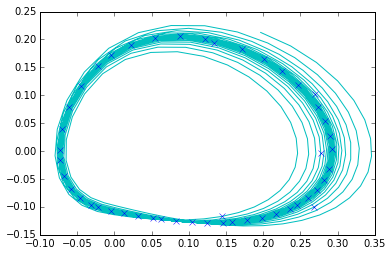

In [54]:
R=47e3
Ro=157e3
#Rv=np.linspace(50e3,250e3,1000)
Rv=50e3
Vo=.253
vector=np.zeros(3)
vector[0]=.75
vector[1]=0.
vector[2]=0
N=5000
skip=100
time=np.linspace(0,6000,N)
answer=odeint(sprott_ckt,vector,time,args=(Rv,))
answer=answer[skip:]
offset=50
max_index=(N-skip)-offset
P_thetas=[]
P_omegas=[]
for i, position in enumerate(answer[:,0]):
    while position>np.pi:
        position=position-(2.*np.pi)
    while position<-np.pi:
        position=position+(2.*np.pi)
    answer[i,0]=position

for j in range(offset,max_index,steps):
    P_thetas.append(answer[j ,0])
    P_omegas.append(answer[j ,1])
plt.plot(answer[:,0],answer[:,1],'c')
plt.plot(P_thetas,P_omegas,'bx')

In [19]:
len(time)

300

In [20]:
len(answer)

200